# Predict ETA (Hit)

In [3]:
# Python required libraries
#----------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import mlab

import warnings
warnings.filterwarnings("ignore")

# Loading Clear Data

In [4]:
# Loading data(1 month data)
#-------------------
df_CSV = pd.read_csv('../CSV/Prism/prism_hit.csv')

In [5]:
# Checking data
#-----------------
print("Total hit observations = ", df_CSV.shape[0])
df_CSV.head(3)

Total hit observations =  175640


,ScreeningID,IFN_ID,State,County,ScreeningQualifier,ScreeningType,StartDateTime,PublishDateTime,ResultStatus,Vendor,State-County,ETA
0,ï»¿F400A985-F59C-42D0-8CDA-48840859F699,82902558,co,jefferson,county,criminal,2019-03-30 19:07:45.410,2019-03-30 19:08:58.313,hit,fdi_co_mc_cocourts,co_jefferson,1
1,B7C61DD0-D17E-44AC-ADB7-C575D7CE1BED,151554174,az,mohave,county,criminal,2019-03-30 14:51:39.823,2019-03-30 14:52:46.450,hit,fdi_az_statewide,az_mohave,1
2,40922C3B-2442-43D6-83AB-18C497C1AE20,82900922,fl,broward,county,criminal,2019-03-30 14:10:17.973,2019-03-30 14:54:53.290,hit,cwi_fl_broward_smd,fl_broward,44


# ETA Analysis of ALL (Clear Requests)

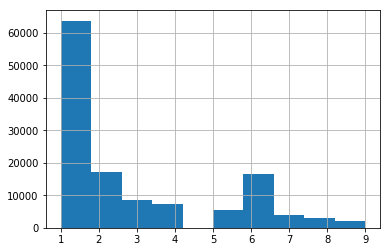

In [6]:
# PLoting hist of ETA less than 10
# Outcome: More than half of requests have an ETA less than 1 min.
#-----------------------------------
df_CSV[df_CSV['ETA'] < 10]['ETA'].hist()

In [7]:
# Creating percentile of ETA( Clear )
#-------------------------

print("min = ", df_CSV["ETA"].min())
print("max = ", df_CSV["ETA"].max())
print("---------------")

def percentile_show(x):
    for per in x:
        print(per,"   -",np.round(np.percentile(df_CSV["ETA"],per),2))
        pass
    pass


x = [10,20,30,40,50,60,70,80,90,91, 92, 93, 94, 95,96,97,98,99,100]
percentile_show(x)


min =  1
max =  8122
---------------
10    - 1.0
20    - 1.0
30    - 1.0
40    - 2.0
50    - 3.0
60    - 6.0
70    - 8.0
80    - 26.0
90    - 91.0
91    - 116.0
92    - 138.0
93    - 171.0
94    - 218.0
95    - 325.0
96    - 449.0
97    - 552.0
98    - 659.0
99    - 966.0
100    - 8122.0


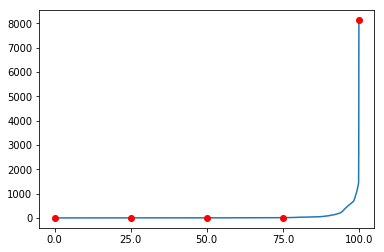

In [8]:
# PLoting ETA (Total) percentile
#-----------------------------------

#d = np.sort(df_CSV["ETA"]).cumsum()
d = np.sort(df_CSV["ETA"])

#print("d = ", d)
# Percentile values
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])

perc = mlab.prctile(d, p=p)

plt.plot(d)
# Place red dots on the percentiles
plt.plot((len(d)-1) * p/100., perc, 'ro')

# Set tick locations and labels
plt.xticks((len(d)-1) * p/100., map(str, p))

plt.show()

# Group By State-County

In [9]:
# Split clear data state-county wise
#------------------------------------------

#df_CSV.groupby(['State','State-County'])['ETA'].mean()

df_Group_State = df_CSV.groupby(['State','County', 'State-County'])

df_Group_State

In [10]:
# Get Statistics of each state-county ETA
#----------------------------------------------
import math

# ETA Mean -------
ETA_Mean = round(df_Group_State['ETA'].mean())
#print("ETA_Mean.shape = ", ETA_Mean.shape)

# ETA Median -------
ETA_Median = round(df_Group_State['ETA'].median())

# ETA Kurt --------
#ETA_Kurt = df_Group_State['ETA'].apply(pd.DataFrame.kurt)

# Eta Skew-------
ETA_Skew = df_Group_State['ETA'].apply(pd.DataFrame.skew)

# Eta Count------
ETA_Count = df_Group_State['ETA'].count()

# ETA Max --------
ETA_Max = round(df_Group_State['ETA'].max())


# ETA Percentile (25%)--------
ETA_Quantile_25 = round(df_Group_State["ETA"].quantile(0.25))


# ETA Percentile (75%)--------
ETA_Quantile_75 = round(df_Group_State["ETA"].quantile(0.75))

# ETA Percentile (95%)--------
ETA_Quantile_95 = round(df_Group_State["ETA"].quantile(0.95))
#print("ETA_Quantile.shape = ", ETA_Quantile.shape)

# ETA Percentile (99%)--------
ETA_Quantile_99 = round(df_Group_State["ETA"].quantile(0.99))
#print("ETA_Quantile.shape = ", ETA_Quantile.shape)

# ETA IQR (Interquartile Range)-------
ETA_IQR = round((ETA_Quantile_75 - ETA_Quantile_25)*1.5)
#ETA_IQR

# Lower and Upper Outliers--------

ETA_LowerOutlier = ETA_Quantile_25 - ETA_IQR
ETA_LowerOutlier = ETA_LowerOutlier.apply(lambda x: 0 if x < 0 else x)

ETA_UpperOutlier = ETA_Quantile_75 + ETA_IQR
#ETA_LowerOutlier = ETA_UpperOutlier.apply(lambda x: 0 if x >= ETA_Max else x)



print("Total State-county counts= ", ETA_Mean.shape[0])

Total State-county counts=  1382


In [11]:
# Calculate Mode of ETA and Mode Count
#--------------------------------------
def CalculateMode(x):
    #print(x)
    #maxValue = x.value_counts().max()
    idValue = x.value_counts().idxmax()
    #print("maxValue", maxValue)
    #print("idValue", idValue)
    #print("--------")
    #print(x.value_counts())
    return idValue

def CalculateModeValueCount(x):

    maxValue = x.value_counts().max()
    return maxValue

# ETA Mode -------
ETA_Mode = df_Group_State['ETA'].apply(lambda x: CalculateMode(x))

# ETA Mode Value Count -------
ETA_Mode_Count = df_Group_State['ETA'].apply(lambda x: CalculateModeValueCount(x))


ETA_ModePercentage = (ETA_Mode_Count/ETA_Count)*100
#ETA_ModePercentage

In [12]:
# Calculate count percentage of outliers
# Percentage of request counts above 'Upper Quartile Range' and below 'Below Quartile Range'
#-----------------------------------------------------------------------------------------

def CalculatePercentile75(x, isUpper):
    
    quant75 = x.quantile(0.75)
    quant25 = x.quantile(0.25)
    
    ETA_IQR = round((quant75 - quant25)*1.5)
    
    UpperIQR = quant75 + ETA_IQR
    LowerIQR = quant25 - ETA_IQR
    
    if isUpper== True:
        y = x[x > UpperIQR]
    else:
        y = x[x < LowerIQR]
        
    count = y.shape[0]
    count1 = x.shape[0]
    percent = (count/count1)*100
    #print(y.shape[0])
    return percent

# ETA percentile count -------
ETA_UpperOutlierPercentage = df_Group_State['ETA'].apply(lambda x: CalculatePercentile75(x, True))
ETA_LowerOutlierPercentage = df_Group_State['ETA'].apply(lambda x: CalculatePercentile75(x, False))


In [13]:
# Creating a DataFrame of all unique Groups (State and County) and their findings
#---------------------------------------------------------
df_County_ETA = pd.DataFrame(df_Group_State.size().reset_index(name = "Count"))

#print("ETA_Mean = ", type(ETA_Mean))

# Adding Mean, Max and Quantile to dataframe-----
df_County_ETA['Mean'] = ETA_Mean.values

df_County_ETA['Median'] = ETA_Median.values

#df_County_ETA['Skew'] = df_County_ETA['Mean'] - df_County_ETA['Median'] 

df_County_ETA['Skew'] =  ETA_Skew.values

df_County_ETA['Mode'] = ETA_Mode.values

df_County_ETA['ModeCount'] = ETA_Mode_Count.values

df_County_ETA['ModePercentage'] = ETA_ModePercentage.values

df_County_ETA['Max'] = ETA_Max.values

df_County_ETA['Quant_25'] = ETA_Quantile_25.values

df_County_ETA['Quant_75'] = ETA_Quantile_75.values

df_County_ETA['Quant_95'] = ETA_Quantile_95.values

df_County_ETA['Quant_99'] = ETA_Quantile_99.values

df_County_ETA['IQR'] = ETA_IQR.values

df_County_ETA['LowerOutlier'] = ETA_LowerOutlier.values

df_County_ETA['LowerOutlierPercentage'] = ETA_LowerOutlierPercentage.values

df_County_ETA['UpperOutlier'] = ETA_UpperOutlier.values

df_County_ETA['UpperOutlierPercentage'] = ETA_UpperOutlierPercentage.values



In [14]:
df_County_ETA.head()

,State,County,State-County,Count,Mean,Median,Skew,Mode,ModeCount,ModePercentage,Max,Quant_25,Quant_75,Quant_90,Quant_95,IQR,LowerOutlier,LowerOutlierPercentage,UpperOutlier,UpperOutlierPercentage
0,ak,aleutians west,ak_aleutians west,3,7.0,5.0,1.152070,15,1,33.333333,15,3.0,10.0,14.0,14.0,10.0,0.0,0.0,20.0,0.000000
1,ak,anchorage,ak_anchorage,310,2.0,1.0,4.656773,1,209,67.419355,28,1.0,2.0,7.0,7.0,2.0,0.0,0.0,4.0,11.612903
2,ak,fairbanks north star,ak_fairbanks north star,116,2.0,1.0,3.260446,1,86,74.137931,20,1.0,2.0,9.0,9.0,2.0,0.0,0.0,4.0,12.931034
3,ak,juneau,ak_juneau,22,2.0,1.0,1.975715,1,16,72.727273,8,1.0,2.0,5.0,5.0,2.0,0.0,0.0,4.0,22.727273
4,ak,kenai peninsula,ak_kenai peninsula,61,3.0,1.0,3.970063,1,40,65.573770,23,1.0,4.0,7.0,7.0,4.0,0.0,0.0,8.0,3.278689


# Statistical Calculations Analysis

In [15]:
# Creating a new Dataframe

df_Calculated_ETA = pd.DataFrame()

In [16]:
df_County_ETA.shape
df_County_ETA.head()

,State,County,State-County,Count,Mean,Median,Skew,Mode,ModeCount,ModePercentage,Max,Quant_25,Quant_75,Quant_90,Quant_95,IQR,LowerOutlier,LowerOutlierPercentage,UpperOutlier,UpperOutlierPercentage
0,ak,aleutians west,ak_aleutians west,3,7.0,5.0,1.152070,15,1,33.333333,15,3.0,10.0,14.0,14.0,10.0,0.0,0.0,20.0,0.000000
1,ak,anchorage,ak_anchorage,310,2.0,1.0,4.656773,1,209,67.419355,28,1.0,2.0,7.0,7.0,2.0,0.0,0.0,4.0,11.612903
2,ak,fairbanks north star,ak_fairbanks north star,116,2.0,1.0,3.260446,1,86,74.137931,20,1.0,2.0,9.0,9.0,2.0,0.0,0.0,4.0,12.931034
3,ak,juneau,ak_juneau,22,2.0,1.0,1.975715,1,16,72.727273,8,1.0,2.0,5.0,5.0,2.0,0.0,0.0,4.0,22.727273
4,ak,kenai peninsula,ak_kenai peninsula,61,3.0,1.0,3.970063,1,40,65.573770,23,1.0,4.0,7.0,7.0,4.0,0.0,0.0,8.0,3.278689


In [17]:
df_County_ETA_Mean = df_County_ETA

# Perfect Data

In [18]:
# TAking Mean ETA for perfect data
#-----------------------------------------
df_Skew = df_County_ETA_Mean[df_County_ETA['Skew'] == 0]
#df_Calculated_ETA = df_Skew
df_Calculated_ETA = df_Calculated_ETA.append(df_Skew[['State', 'County', 'State-County', 'Mean']], sort=False)

print("State-county having perfect data = ", df_Skew.shape[0])

#Excluding all the perfect data now----
df_County_ETA_Mean = df_County_ETA_Mean[df_County_ETA['Skew'] != 0]
df_County_ETA_Mean.shape
print("State-county having outliers = ", df_County_ETA_Mean.shape[0])

State-county having perfect data =  32
State-county having outliers =  1350


# Mode count values with greater than 80%

In [19]:
# Taking Mode, if Mode value count is above 80%
#-------------------------
df_Mode = df_County_ETA_Mean[df_County_ETA_Mean['ModePercentage'] >= 80]

print("State-county having mode greater than 80%  = ", df_Mode.shape[0])

df_Calculated_ETA = df_Calculated_ETA.append(df_Mode[['State', 'County', 'State-County', 'Mean']], sort=False)


#Excluding all the perfect data now----
df_County_ETA_Mean = df_County_ETA_Mean[df_County_ETA['ModePercentage'] < 80]

State-county having mode greater than 80%  =  142


In [21]:
df_County_ETA_Mean.head(2)

,State,County,State-County,Count,Mean,Median,Skew,Mode,ModeCount,ModePercentage,Max,Quant_25,Quant_75,Quant_90,Quant_95,IQR,LowerOutlier,LowerOutlierPercentage,UpperOutlier,UpperOutlierPercentage
0,ak,aleutians west,ak_aleutians west,3,7.0,5.0,1.152070,15,1,33.333333,15,3.0,10.0,14.0,14.0,10.0,0.0,0.0,20.0,0.000000
1,ak,anchorage,ak_anchorage,310,2.0,1.0,4.656773,1,209,67.419355,28,1.0,2.0,7.0,7.0,2.0,0.0,0.0,4.0,11.612903


# Right Skew

In [22]:
df_County_ETA_Mean.shape
df_Calculated_ETA.shape

(174, 4)

In [23]:
# Our data consists of left and right skew data now.
#----------------------
# Remove the upper outliers if their count is less than 20%
# Replace their mean with new mean/Median

df_County_ETA_RightSkew = df_County_ETA_Mean[(df_County_ETA_Mean['UpperOutlierPercentage']  <=  20) & (df_County_ETA_Mean['Skew'] > 0)]
df_County_ETA_RightSkew.shape

print("State-County with 75 percentile as perfect data = ", df_County_ETA_RightSkew.shape[0])

#Excluding all the perfect data now----
df_County_ETA_Mean = pd.concat([df_County_ETA_Mean, df_County_ETA_RightSkew]).drop_duplicates(keep=False)
#df_County_ETA_Mean.shape


State-County with 75 percentile as perfect data =  939


In [24]:
df_CSV_1 = df_CSV[(df_CSV['State-County'].isin(df_County_ETA_RightSkew['State-County']))]

df_CSV_1.shape


(137463, 12)

In [25]:
df_CSV_1.shape

df_Group_State1 = df_CSV_1.groupby(['State','County', 'State-County'])

# Calculate Mode of ETA and Mode Count
#--------------------------------------
def CalculateNewMean(x):

    upperLimit = x.quantile(.75)
    x = x[x <= upperLimit]
    
    return round(x.mean())

# ETA Mode -------
ETA_NewMean = df_Group_State1['ETA'].apply(lambda x: CalculateNewMean(x))


In [26]:
df_County_ETA1 = pd.DataFrame(df_Group_State1.size().reset_index(name = "Count"))
df_County_ETA1['Mean'] = ETA_NewMean.values
df_County_ETA1.shape

(939, 5)

# Left Skew Data

In [27]:
# Our data consists of left and right skew data now.
#----------------------
# Remove the upper outliers if their count is less than 20%
# Replace their mean with new mean/Median

df_County_ETA_RightSkew = df_County_ETA_Mean[(df_County_ETA_Mean['Skew'] > 0)]
df_County_ETA_RightSkew.shape

print("State-County with 75 percentile as perfect data = ", df_County_ETA_RightSkew.shape[0])

#Excluding all the perfect data now----
df_County_ETA_Mean = pd.concat([df_County_ETA_Mean, df_County_ETA_RightSkew]).drop_duplicates(keep=False)
#df_County_ETA_Mean.shape


(443, 20)

In [601]:
df_County_ETA.shape

(300, 18)

# Remaining Data

In [ ]:
df_CSV_1.drop()

ETA_LowerOutlier.apply(lambda x: 0 if x < 0 else x)


In [ ]:
df_CSV.groupby(['State-County','County', 'State-County'])

df_County_ETA['UpperOutlier']

In [ ]:
df_Group_State1 = df_CSV_1.groupby(['State','County', 'State-County'])

ETA_Mean = round(df_Group_State1['ETA'].mean())



ETA_Mean.shape